In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pylab as pl
from solutions import *
import time as t

In [2]:
font = {'weight' : 'light',
        'size'   : 14}
matplotlib.rc('font', **font)

Defining units to be used : astronomical unit, velocity of light, parsec, milliarcsecond and classical electron radius.

In [3]:
AU = 1.469e13
c=2.99792458e10
pc=3.0e18
mas=4.848e-9
re =2.8e-13

The values of the distances to the pulsar $D_p$ and to the lense $D_{lens}$ from Siqi's paper analysis.

In [4]:
dp=620.* pc
dlens=389.* pc
dlens

1.167e+21

 The definitions for characterization parameters from Simard's paper and input of the wavelenght of observations $\lambda = c/\nu$ where $\nu$ is the center frequency of observations 314.5 MHz.

In [5]:
Deff=dp*dlens/(dp-dlens)
s = 1.-dlens/dp
l=c/314.5e6

$\beta$ is the true position of the pulsar, we create an array to move the pulsar behind the lens from -1000 mas to 1000 mas, that is to say -1 arcsec to 1 arcsec.

In [6]:
#temporarily changed for speeding purposes
betas = -500. + (np.arange(2*50000)*0.01)
betas

array([-500.  , -499.99, -499.98, ...,  499.97,  499.98,  499.99])

Lens parameters we can play with : the amplitude of the Alfven wave $A$, its wavelenght $\lambda_A$, the thickness of the sheet $T$ and the electron density within the lens $\Delta n_e$. 

In [7]:
A = 0.3*AU
la = 10**5.*AU
T = 0.03*AU
dne = 0.003

Finally we define the radius of curvature of the lens $R$, the dimensionless parameters $\theta_R$ and $\theta_T$ and the variation of index of refraction $\Delta n$.

In [8]:
R = la**2./(4.*np.pi**2*A)

thetaR=R/dlens
thetaT=T/dlens
dn = -l**2./(2.*np.pi)*dne*re
dn

-1.2147852890204983e-12

In [9]:
R/pc

4134.467188072062

The function to get theta is solving the lens equation of the specific for of the 6th order polynomial $$ p = 4 \theta^6 +
         (2 \theta_R - 8 \beta) \theta^5+
         (4 \beta^2 - 4 \beta\theta_R )\theta^4+
         (2\beta^2\theta_R)\theta^3 
         -(s \Delta n \theta_R \theta_T)^2$$
The specific way to select the right root comes from Mathematica. 

# Divergent

For a divergent lens, the variation of electron density $\Delta n_e$ is positive, so the sign of $\Delta n$ remains negative.

In [17]:
dnd=dn

We compute the locations $\theta_d$ and magnifications $\mu_d$ of the lensed image for each real position $\beta$ of the pulsar.

In [11]:
thetasd = np.zeros((len(betas),2)) 
musd = np.zeros((len(betas),2))
for i in np.arange(0, len(thetasd)):# range(len(thetasd)):
    thetasd[i] = get_theta(dnd,thetaR,thetaT,betas[i]*mas,s)/mas
    musd[i] = get_mu(dnd,thetaR,thetaT,betas[i]*mas,s)
    if thetasd[i,0]==thetasd[i,1]:
        thetasd[i,:] = [None,None]
        musd[i,:] = [None,None]

# The last line doesn't change anything but raises a RuntimeWarning for comparing some nan in thetasd with values
musd[(thetasd>0) & (thetasd<T/dlens)]=0.

solutions.py:29: RuntimeWarning: invalid value encountered in power
  + ( s * dn * thetaR * thetaT)/(theta**3.*(1. + thetaR/(2. * theta))**(1./2.))))
solutions.py:29: RuntimeWarning: invalid value encountered in sqrt
  + ( s * dn * thetaR * thetaT)/(theta**3.*(1. + thetaR/(2. * theta))**(1./2.))))
solutions.py:29: RuntimeWarning: divide by zero encountered in divide
  + ( s * dn * thetaR * thetaT)/(theta**3.*(1. + thetaR/(2. * theta))**(1./2.))))
solutions.py:29: RuntimeWarning: invalid value encountered in multiply
  + ( s * dn * thetaR * thetaT)/(theta**3.*(1. + thetaR/(2. * theta))**(1./2.))))
/Users/beatrice/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/Users/beatrice/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


In [12]:
#musd

In [13]:
#thetasd

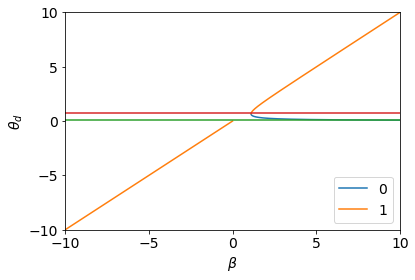

In [14]:
plt.plot(betas,thetasd.T[0], label='0')
plt.plot(betas,thetasd.T[1], label='1')
plt.plot([-10,10],[T/dlens/mas,T/dlens/mas])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\theta_d$')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.legend()
plt.plot([-10,10],[A/dlens/mas,A/dlens/mas])

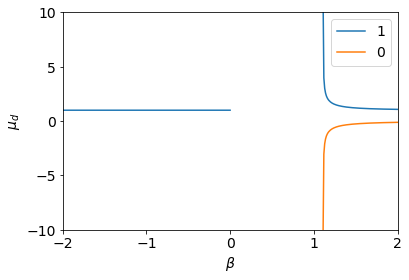

In [15]:
plt.plot(betas,musd.T[1], label='1')
plt.plot(betas,musd.T[0], label='0')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\mu_d$')
plt.ylim(-10,10)
plt.xlim(-2,2)
plt.legend()

### Check the maximum separation

In [24]:
T/dlens/mas, thetaT/mas

1.2147852890204983e-12

In [23]:
thetasd0 = thetasd[:,0][thetasd[:,0]==thetasd[:,0]] # don't understand this statement
arg = np.where(thetasd[:,0]==thetasd0[np.argmin(np.absolute(thetasd0-T/dlens/mas/2))])

In [56]:
thetasd[arg],thetasd[arg,0]-thetasd[arg,1],musd[arg,0]/musd[arg,1]

(array([[  3.89469740e-02,   1.25339314e+02]]),
 array([[-125.30036665]]),
 array([[ 0.]]))

### Check the magnification at a flux ratio of 0.01

In [57]:
flux_ratiod = musd[:,0]/musd[:,1]
flux_ratiod2 = flux_ratiod[flux_ratiod==flux_ratiod]
arg2 = np.where(flux_ratiod==flux_ratiod2[np.argmin(np.absolute(np.absolute(flux_ratiod2) -0.01))])
thetasd[arg2,0]-thetasd[arg2,1],flux_ratiod[arg2]

(array([[-12.27504403]]), array([-0.00999712]))

### Check the minimum separation

In [58]:
sep = thetasd[:,0]-thetasd[:,1]
sep0 = sep[sep==sep]
sep0[np.argmax(sep0)]

-0.18427628242719063

In [59]:
thetasd0 = thetasd[:,0][thetasd[:,0]==thetasd[:,0]]
arg = np.where(thetasd[:,0]==thetasd0[np.argmin(np.absolute(thetasd0-A/dlens/mas))])

In [60]:
thetasd[arg],thetasd[arg,0]-thetasd[arg,1],musd[arg,0]/musd[arg,1]

(array([[ 0.77884988,  1.77155535]]),
 array([[-0.99270547]]),
 array([[-0.38514275]]))

# Convergent

In [20]:
dnc=-dn
thetasc = np.zeros((len(betas),2)) 
musc = np.zeros((len(betas),2))
for i in range(len(thetasc)):
    thetasc[i] = get_theta(dnc,thetaR,thetaT,betas[i]*mas,s)/mas
    musc[i] = get_mu(dnc,thetaR,thetaT,betas[i]*mas,s)
    if thetasc[i,0]==thetasc[i,1]:
        thetasc[i,:] = [None,None]
        musc[i,:] = [None,None]
musc[(thetasc>0) & (thetasc<T/dlens/mas)]=0.

/Users/beatrice/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/Users/beatrice/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


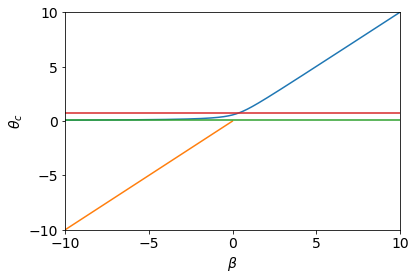

In [26]:
plt.plot(betas,thetasc)
plt.plot([-10,10],[T/dlens/mas,T/dlens/mas])
plt.plot([-10,10],[A/dlens/mas,A/dlens/mas])
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\theta_c$')

(-10, 10)

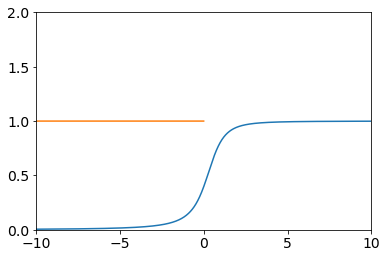

In [27]:
plt.plot(betas,musc)
plt.ylim(0,2)
plt.xlim(-10,10)

In [64]:
musc

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       ..., 
       [ 0.99999995,         nan],
       [ 0.99999995,         nan],
       [ 0.99999995,         nan]])

### Check the minimum separation

In [65]:
arg = np.where(betas==0)
thetasc[arg[0]-1]

array([[ 0.98107996, -0.01      ]])

### Check the maximum separation

In [66]:
T/dlens/mas

0.07789500029694486

In [67]:
thetasc0 = thetasc[:,0][(thetasc[:,0]==thetasc[:,0])]
thetasc0 = thetasc0[thetasc0!=0.]
arg = np.where(thetasc[:,0]==thetasc0[np.argmin(np.absolute(thetasc0-T/dlens/mas/2))])

In [68]:
thetasc[arg],thetasc[arg,0]-thetasc[arg,1],musc[arg,0]/musc[arg,1],musc[arg[0]+1,0]/musc[arg[0]+1,1]

(array([[  3.89474104e-02,  -1.25260000e+02]]),
 array([[ 125.29894741]]),
 array([[ 0.]]),
 array([ 0.]))

### Check the magnification at a flux ratio of 0.01

In [69]:
flux_ratioc = musc[:,0]/musc[:,1]
flux_ratioc2 = flux_ratioc[flux_ratioc==flux_ratioc]
arg2 = np.where(flux_ratioc==flux_ratioc2[np.argmin(np.absolute(np.absolute(flux_ratioc2) -0.01))])
thetasc[arg2,0]-thetasc[arg2,1],flux_ratioc[arg2]

(array([[ 12.16438129]]), array([ 0.01000389]))

In [70]:
np.argmin(np.absolute(np.absolute(flux_ratioc2) -0.01))

98802

In [71]:
flux_ratioc2[np.argmin(np.absolute(np.absolute(flux_ratioc2) -0.01))]

0.010003893386969928

In [72]:
musc[arg[0]:100000,0]

/Users/dana/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  if __name__ == '__main__':


array([ 0.        ,  0.        ,  0.        , ...,  0.39273591,
        0.39514718,  0.39756859])

### Check the minimum separation

In [73]:
thetasc0 = thetasc[:,0][(thetasc[:,0]==thetasc[:,0])]
thetasc0 = thetasc0[thetasc0!=0.]
arg = np.where(thetasc[:,0]==thetasc0[np.argmin(np.absolute(thetasc0-A/dlens/mas))])

In [74]:
thetasc[arg],thetasc[arg,0]-thetasc[arg,1],musc[arg,0]/musc[arg,1],musc[arg[0]+1,0]/musc[arg[0]+1,1]

(array([[ 0.77947227, -0.62      ]]),
 array([[ 1.39947227]]),
 array([[ 0.27077414]]),
 array([ 0.27249482]))

### Scale of $\theta_{ref}$

In [10]:
np.sqrt(2.), s, dn, thetaT, np.sqrt(thetaR)

(1.4142135623730951,
 0.3725806451612903,
 -1.2147852890204983e-12,
 3.776349614395887e-10,
 3.2601304199281711)

In [11]:
theta_ref = ((np.sqrt(2.)/2.)*s*dn*thetaT*np.sqrt(thetaR))

In [16]:
theta_ref**(2.)

1.5524726944365597e-43

In [41]:
(2.2e-9)**5.

5.153631999999998e-44